In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

from psikit import Psikit

In [3]:
df = pd.read_csv('smiles.csv')
df

,smiles
0,[CH2][CH2]
1,[CH2]=O
2,[CH]#N
3,CC[OH]
4,[CH3][CH2]C(O)=O
5,[CH3]N=C=O
6,C1=CCC=CC1
7,C1=CC=CC=C1
8,C1=C(C)C=CC=C1
9,C1CCC2CCCCC2C1


In [4]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df["n_Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())

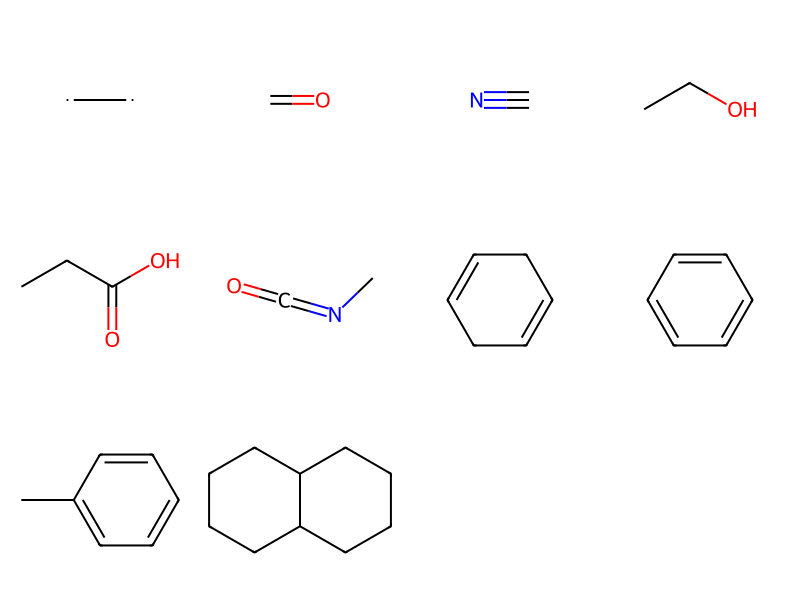

In [5]:
PandasTools.FrameToGridImage(df, molsPerRow=4)

In [6]:
from tqdm import tqdm
en_list = []
for smi in tqdm(df['smiles']):
    pk=Psikit(debug=True,threads=1,memory=12)
    pk.read_from_smiles(smi)
    %time
    en_list.append(pk.optimize())
df['energy'] = en_list

  0%|          | 0/10 [00:00<?, ?it/s]


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


 10%|█         | 1/10 [00:04<00:43,  4.83s/it]

Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


 20%|██        | 2/10 [00:06<00:21,  2.73s/it]

Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


 30%|███       | 3/10 [00:07<00:13,  2.00s/it]

Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


 40%|████      | 4/10 [00:11<00:18,  3.00s/it]

Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


 50%|█████     | 5/10 [00:31<00:45,  9.10s/it]

Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


 60%|██████    | 6/10 [00:38<00:33,  8.28s/it]

Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


 70%|███████   | 7/10 [00:57<00:35, 11.76s/it]

Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


 80%|████████  | 8/10 [01:03<00:20, 10.08s/it]

Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


 90%|█████████ | 9/10 [01:18<00:11, 11.66s/it]

Optimizer: Optimization complete!
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


100%|██████████| 10/10 [02:21<00:00, 14.14s/it]

Optimizer: Optimization complete!


,smiles,ROMol,n_Atoms,energy
0,[CH2][CH2],,2,-78.038769
1,[CH2]=O,,2,-113.869536
2,[CH]#N,,2,-92.876942
3,CC[OH],,3,-154.089919
4,[CH3][CH2]C(O)=O,,5,-266.858985
5,[CH3]N=C=O,,4,-206.795593
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552
9,C1CCC2CCCCC2C1,,10,-389.204842

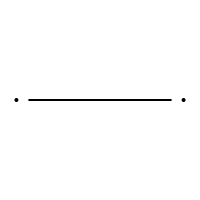
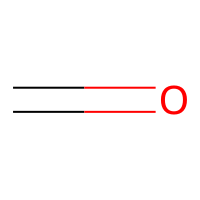
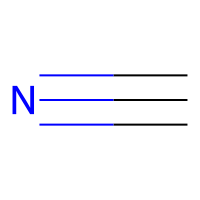
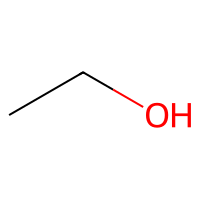
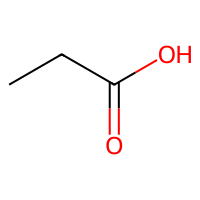
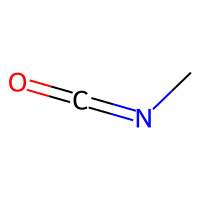
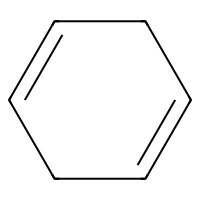
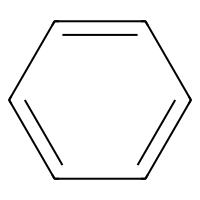
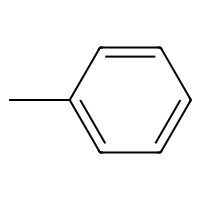
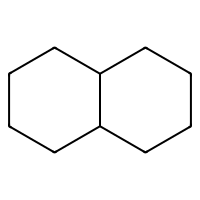

In [7]:
df